## Analysis of WRF Hurricane Katrina data: Group Lab Coding Activity
- Let's continue working with Hurricane Katrina simulation data!
<br><br>
- *Data - all at the SURFACE*
  - Reflect (reflectivity; precipitation intensity; dBZ)
  - Pres (pressure; lower pressures = stronger hurricane; mb)
  - Usfc (u-component, east-west, of wind; m/s)
  - Vsfc (v-component, north-south, of wind; m/s)
<br><br>
- Can't see this stunning satellite image below? 
https://www.weather.gov/images/mob/events/katrina/Hurr_Katrina_29Aug_Satellite2.png

In [2]:
import xarray as xr
import numpy as np
import glob
import pandas as pd
from matplotlib import pyplot as plt
import cartopy.crs as ccrs 
import cartopy.feature as cfeature


#(1) First, download and read in the data
#(a.) Downloading

#import urllib.request # module for downloading data from URLs
#import zipfile # module for handling zipfiles 

# All data in a zipped, single "file" that you can download using urllib or something comparable

#filename = 'wrfout.zip'
#url = 'http://rfd.atmos.uiuc.edu/Atms517/week9/wrfout.zip'
#urllib.request.urlretrieve(url, filename)

# Okay - now we have to extra files from this zip file
#with zipfile.ZipFile('wrfout.zip', 'r') as zip_ref:
#    zip_ref.extractall('./') # you can provide path of where you want the files unzipped to - './'' is current directory

#(b.) Reading in the files

In [3]:
#!!!!!!!!!!!!!!!!!!!!!!!!!!!
# PUT THIS NOTEBOOK IN THE SAME FOLDER AS ALL YOUR WRFOUT FILES
#!!!!!!!!!!!!!!!!!!!!!!!!!!

filenames = glob.glob('./week9_data/wrfout*.nc')
filenames.sort()

li = []
for file in filenames:
    ds = xr.open_dataset(file)
    li.append(ds)   # li is a list containing Xarray datasets! Cool!

# (a.)
print(li[0].coords) # just lat and lon 
# But we KNOW that we want to merge these together chronologically
# (b.) + (c.) Merge - create new dimension called time
ds = xr.concat(li,dim='time')
print(ds.dims) # yay, time dimension! but no coordinates! Let's fix that!
# (d.)  You will find the code for this part in the 'Hints' text file - you're welcome to use it!  Just want to 
# give folks a chance to play around with some of this themselves first if they'd like 

# Hint that won't spoil it
# You'll need to first pull the time info from each file name, yes?

#******************************************
# How do we extract times from our filenames?
# They are like: wrfout_d01_2005-08-27_12_00_00.nc
#*****************************************

time=[]
# Iterate through each file in filenames - may need to change names of variables if you called your list of files 
# from glob.glob or whatnot something different 

# There are certainly more advanced ways to do this (I envision with...regular expressions or such), but here's how we can 
# do it
for file in filenames:
                # split breaks the given string by the specified separator
                # here, want to break the string after wrfout.... bit, and then we want the SECOND element of the list,
                # that is returned, which is actually the timestamp (the date) - thus the [1]
                #    print(file.split('wrfout_d01_')) returns a LIST 
                
                # rstrip removes trailing characters - default whitespaces but we specify here the file extension
                # as what we want to remove
    time.append(file.split("wrfout_d01_")[1].rstrip('.nc'))   
    
# More on datetime next week - but we're telling the Pandas date-time function how to translate the time stamps in
# the file name to something Python understands
time = pd.to_datetime(time,format='%Y-%m-%d_%H_%M_%S')

times = time
# https://xarray.pydata.org/en/stable/generated/xarray.Dataset.assign_coords.html for more info
# use our created and recently converted into date-time object list of times
ds2 =ds.assign_coords(time=('time', time))

# Horray! We now have time coordinates! :)

# (2) Calculate wind speed - sqrt
# (a.) + (b.) 
# Create new variable in dataset called Wind_speed
ds3 = ds2.assign(Wind_speed = 2.24*np.sqrt((ds2['Usfc']*ds2['Usfc'])+(ds2['Vsfc']*ds2['Vsfc'])))

Coordinates:
  * lat      (lat) float32 316B 20.32 20.56 20.8 21.04 ... 38.59 38.83 39.07
  * lon      (lon) float32 356B -99.88 -99.62 -99.37 ... -77.89 -77.64 -77.38
FrozenMappingWarningOnValuesAccess({'time': 25, 'lat': 79, 'lon': 89})


In [4]:
ds3

<xarray.Dataset> Size: 6MB
Dimensions:     (time: 25, lat: 79, lon: 89)
Coordinates:
  * lat         (lat) float32 316B 20.32 20.56 20.8 21.04 ... 38.59 38.83 39.07
  * lon         (lon) float32 356B -99.88 -99.62 -99.37 ... -77.89 -77.64 -77.38
  * time        (time) datetime64[ns] 200B 2005-08-27T12:00:00 ... 2005-08-30...
Data variables:
    Lat         (time, lat, lon) float32 703kB 20.32 20.35 20.37 ... 39.1 39.07
    Lon         (time, lat, lon) float32 703kB -99.88 -99.62 ... -75.31 -75.0
    Landuse     (time, lat, lon) float32 703kB 7.0 7.0 8.0 8.0 ... 6.0 16.0 16.0
    Pres        (time, lat, lon) float32 703kB 1.008e+03 1.008e+03 ... 1.011e+03
    Usfc        (time, lat, lon) float32 703kB 0.1631 0.389 ... -0.6021 -0.3277
    Vsfc        (time, lat, lon) float32 703kB 0.8045 0.8172 ... 1.187 1.448
    Reflect     (time, lat, lon) float32 703kB 0.001 -20.0 ... -2.284 -2.281
    Wind_speed  (time, lat, lon) float32 703kB 1.839 2.027 2.29 ... 2.982 3.326

# !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
# NEW FOR WEEK 10 LAB #
# !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

In [21]:
#**********************
# **************************
# YOU DO!!!!!!!
#**********************
#**********************

# (1) How many gridpoints in our domain have wind speeds above 74 mph - 
# minimum strength for Cateogry 1 hurricane, at 8-29-12:00 UTC?

# You'll want to access ds3['Wind_speed'] for your wind speed data array 
# Recall....what does your_data_array > some threshold give you?
# Think back to NumPy array operations, conceptually
# Although you should do this fully using Xarray operations

# Hint: use 'sum' in Xarray!

w = ds3['Wind_speed'].sel(time='2005-08-29T12:00:00')
w74 = w > 74
print(w74.sum().values)






# sanity check: 142

142


In [12]:
#**********************
# **************************
# YOU DO!!!!!!!
#**********************
#**********************

# (2) How many gridpoints in our domain have wind speeds greater than 74 mph at EACH TIME?
# call your variable 'npts_hurricane'
# you can absolutely do this without a loop!

n = ds3['Wind_speed'] > 74
npts_hurricane = n.sum(dim=['lat','lon'])
print(npts_hurricane)



# Sanity check: 25 pts - <xarray.DataArray 'Wind_speed' (time: 25)>
#array([  7,  41,  54,  58,  68,  73,  77,  95, 113, 124, 150, 154, 155,
#       163, 166, 162, 142, 122,  76,  26,   0,   0,   0,   0,   0])

<xarray.DataArray 'Wind_speed' (time: 25)> Size: 200B
array([  7,  41,  54,  58,  68,  73,  77,  95, 113, 124, 150, 154, 155,
       163, 166, 162, 142, 122,  76,  26,   0,   0,   0,   0,   0])
Coordinates:
  * time     (time) datetime64[ns] 200B 2005-08-27T12:00:00 ... 2005-08-30T12...


Text(0.5, 0, 'Time')

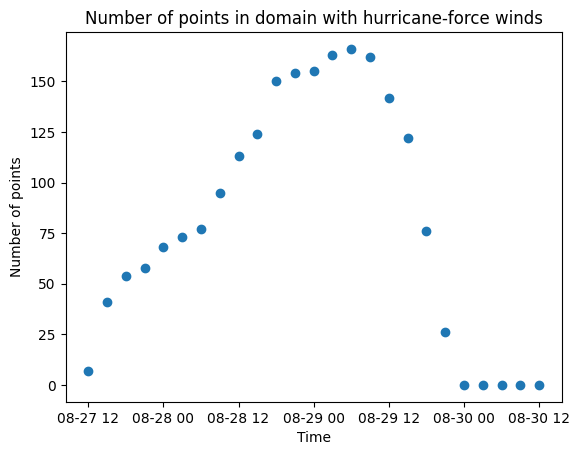

In [13]:
# (3) This will plot the number of gridpoints in our domain at each time that have a wind speed greater than 74 mph for you

fig, ax = plt.subplots()
ax.scatter(ds3['time'].values,npts_hurricane)
ax.set_title('Number of points in domain with hurricane-force winds')
ax.set_ylabel('Number of points')
ax.set_xlabel('Time')

In [16]:
#**********************
# **************************
# YOU DO!!!!!!!
#**********************
#**********************


# (4) This is interesting but we can get more precise.  Let's calculate a ratio of the number of 
# gridpoints with wind speeds greater than 74 mph to the number of gridpoints with speeds just greater than 39 mph
# as 39 mph is the threshold for tropical storm strength winds, AT EACH TIME

# This gives us a feel of which fraction of the tropical storm force wind (or stronger) field is actually quite strong
# (hurricane force and above!)

# So, first, calculate the number of gridpoints with tropical force winds and each time
# And then we'll calculate and plot the ratio in Q5

# call your variable 'npts_tropical'

n39 = ds3['Wind_speed'] > 39
npts_tropical = n39.sum(dim=['lat','lon'])
print(npts_tropical)


# Sanity check

# <xarray.DataArray 'Wind_speed' (time: 25)>
#array([203, 335, 393, 456, 513, 598, 669, 718, 783, 837, 850, 823, 802,
#       823, 851, 861, 886, 867, 776, 695, 619, 552, 432, 322, 184])


<xarray.DataArray 'Wind_speed' (time: 25)> Size: 200B
array([203, 335, 393, 456, 513, 598, 669, 718, 783, 837, 850, 823, 802,
       823, 851, 861, 886, 867, 776, 695, 619, 552, 432, 322, 184])
Coordinates:
  * time     (time) datetime64[ns] 200B 2005-08-27T12:00:00 ... 2005-08-30T12...


Text(0.5, 0, 'Time')

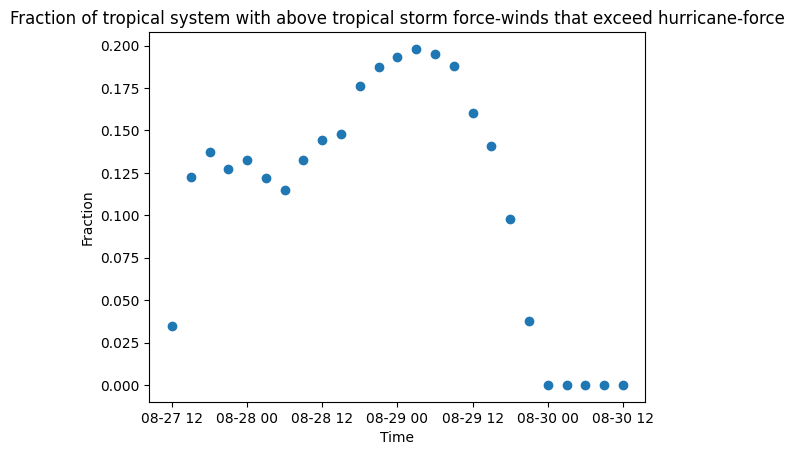

In [17]:
# (5) I plot the ratio for you!
fig, ax = plt.subplots()
ax.scatter(ds3['time'].values,(npts_hurricane/npts_tropical))
ax.set_title('Fraction of tropical system with above tropical storm force-winds that exceed hurricane-force')
ax.set_ylabel('Fraction')
ax.set_xlabel('Time')

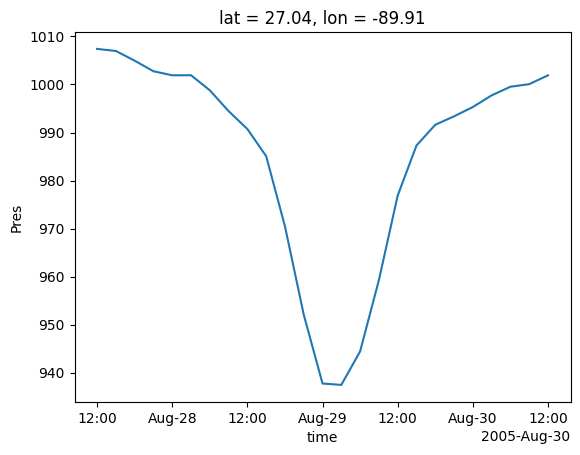

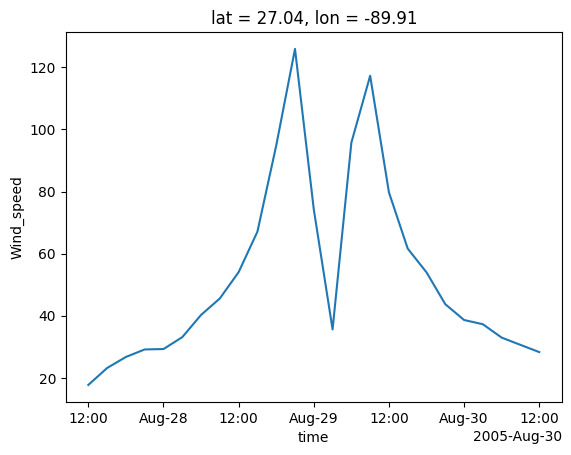

In [25]:
#**********************
# **************************
# YOU DO!!!!!!!
#**********************
#**********************

# (7) How does wind speed change over time at the gridpoint nearest 27 deg N, -90 deg W?  
# How does pressure change over time for this same gridpoint?

# LPT:  CHECK YOUR LONGITUDE COORDINATES!!!!!

# Remember that ds3['Pres'] gets you your pressure field
# And ds3['Wind_speed'] gets you your wind field!

wspd = ds3['Wind_speed'].sel(lat=27,lon=-90, method='nearest')
wspd

pres = ds3['Pres'].sel(lat=27,lon=-90, method='nearest')
pres

pres.plot()
plt.show()
wspd.plot()
plt.show()


In [ ]:
#**********************
# **************************
# YOU DO!!!!!!! OPTIONAL PHYSICAL INTERPRETATION 
#**********************
#**********************

# (8) Looking at my hurricane track plot, (ALSO A GREAT SANITY CHECK for your homework due tomorrow), in what feature/part in the hurricane 
# did you just analyze data in Q7?






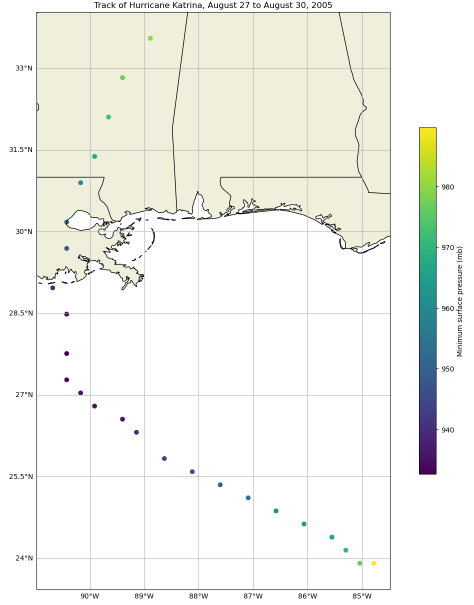